In [1]:
import numpy as np
import matplotlib.pyplot as plt

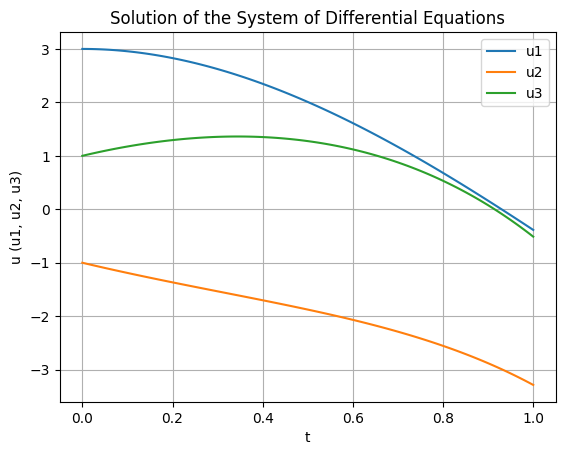

In [10]:

# function for du/dt where u = (u1, u2, u3)
def f1(t, u):
    u1, u2, u3 = u
    du1dt = u1 + 2*u2 - 2*u3 + np.exp(-t)
    du2dt = u2 + u3 - 2*np.exp(-t)
    du3dt = u1 + 2*u2 + np.exp(-t)
    return np.array([du1dt, du2dt, du3dt])

# function for each step of rk4
def rk4_step(f, t, y, h):
    k1 = h * f(t, y)
    k2 = h * f(t + 0.5 * h, y + 0.5 * k1)
    k3 = h * f(t + 0.5 * h, y + 0.5 * k2)
    k4 = h * f(t + h, y + k3)
    y_next = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6

    return y_next

# function to implement rk4 method
def rk4_method(f, t0, tf, u0, h):
    n = int((tf-t0)/h)
    t_values = [t0 + i*h for i in range(n+1)]

    u_values = np.zeros((len(t_values), len(u0)))

    u_values[0] = u0

    for i in range(1, n+1):
        u_values[i] = rk4_step(f, t_values[i-1], u_values[i-1], h)

    return t_values, u_values


t0 = 0  # initial t
u0 = np.array([3.0, -1.0, 1.0])   # initial value of u
tf = 1  # Final t
h = 0.01  # Step size

# solve the differential equations
t_values, u_values = rk4_method(f1, t0, tf, u0, h)

# Plot the results
plt.plot(t_values, u_values[:, 0], label='u1')
plt.plot(t_values, u_values[:, 1], label='u2')
plt.plot(t_values, u_values[:, 2], label='u3')
plt.xlabel('t')
plt.ylabel('u (u1, u2, u3)')
plt.title('Solution of the System of Differential Equations')
plt.legend()
plt.grid(True)
plt.show()
